In [2]:
!pip install geopandas
!pip install cartopy
!pip install classify
!pip install pyepsg
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs
import pyepsg



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.8 MB/s eta 0:00:00


In [3]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

<ipython-input-3-a82b6c9e49ea>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = geopandas.datasets.get_path('naturalearth_lowres')


In [4]:
df.head()
#menampilkan 5 data set teratas

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry    gdp_pp  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  0.006176  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  0.001089  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  0.001504  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  0.046195  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  0.065298

<Axes: >

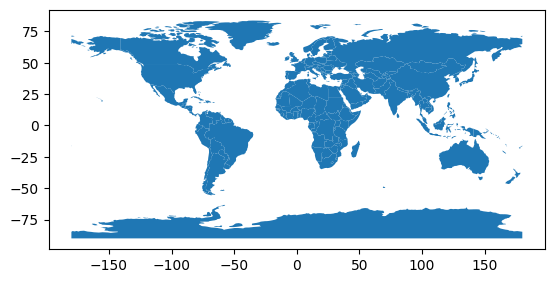

In [5]:
df.plot()

<Axes: >

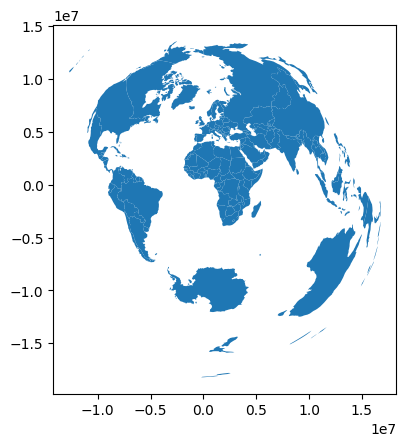

In [6]:
# membuat objek CRS Cartopy
crs = ccrs.AzimuthalEquidistant()

#ini dapat diubah menjadi string/dict `proj4` yang kompatibel dengan GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

#Tampilkan grafik di GeoPandas
df_ae.plot()

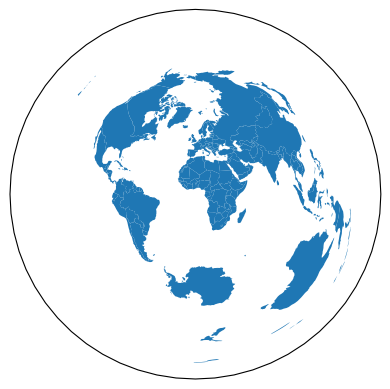

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'],crs = crs)

In [8]:
import geopandas
from geopandas import read_file


In [9]:
!pip install mapclassify

import mapclassify
mapclassify.__version__
#install mapclassify

'2.6.1'

In [10]:
!pip install libpysal

import libpysal
libpysal.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.9 MB/s eta 0:00:00


'4.10'

In [11]:
libpysal.examples.available()



Name                                        Description  Installed
0       10740  Albuquerque, New Mexico, Census 2000 Tract Dat...       True
1      AirBnB  Airbnb rentals, socioeconomics, and crime in C...      False
2     Atlanta       Atlanta, GA region homicide counts and rates      False
3   Baltimore          Baltimore house sales prices and hedonics      False
4   Bostonhsg               Boston housing and neighborhood data      False
..        ...                                                ...        ...
93        taz           Traffic Analysis Zones in So. California      False
94      tokyo                               Tokyo Mortality data       True
95  us_income  Per-capita income for the lower 48 US states 1...       True
96   virginia                        Virginia counties shapefile       True
97       wmat          Datasets used for spatial weights testing       True

[98 rows x 3 columns]

In [12]:
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')


In [13]:
df = read_file(pth)
df.head()

NAME     STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  STFIPS  COFIPS  \
0     Hancock  West Virginia         54       029  54029      54      29   
1      Brooke  West Virginia         54       009  54009      54       9   
2        Ohio  West Virginia         54       069  54069      54      69   
3    Marshall  West Virginia         54       051  54051      54      51   
4  New Castle       Delaware         10       003  10003      10       3   

   FIPSNO  SOUTH      HR60  ...      BLK90      GI59      GI69      GI79  \
0   54029      1  1.682864  ...   2.557262  0.223645  0.295377  0.332251   
1   54009      1  4.607233  ...   0.748370  0.220407  0.318453  0.314165   
2   54069      1  0.974132  ...   3.310334  0.272398  0.358454  0.376963   
3   54051      1  0.876248  ...   0.546097  0.227647  0.319580  0.320953   
4   10003      1  4.228385  ...  16.480294  0.256106  0.329678  0.365830   

       GI89       FH60  FH70       FH80       FH90  \
0  0.363934   9.981297   7.8   9.785797  12.604552   
1  0.350569  10.929337   8.0  10.214990  11.242293   
2  0.390534  15.621643  12.9  14.716681  17.574021   
3  0.377346  11.962834   8.8   8.803253  13.564159   
4  0.332703  12.035714  10.7  15.169480  16.380903   

                                            geometry  
0  POLYGON ((-80.62805 40.39816, -80.60204 40.480...  
1  POLYGON ((-80.52625 40.16245, -80.58760 40.175...  
2  POLYGON ((-80.52517 40.02275, -80.73843 40.035...  
3  POLYGON ((-80.52447 39.72113, -80.83248 39.718...  
4  POLYGON ((-75.77270 39.38301, -75.79144 39.723...  

[5 rows x 70 columns]

KeyError: 'HR60'

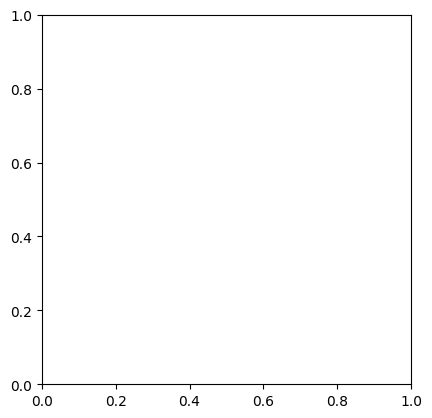

In [29]:
%matplotlib inline
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1,0.5)})
#format peta legenda bawaan

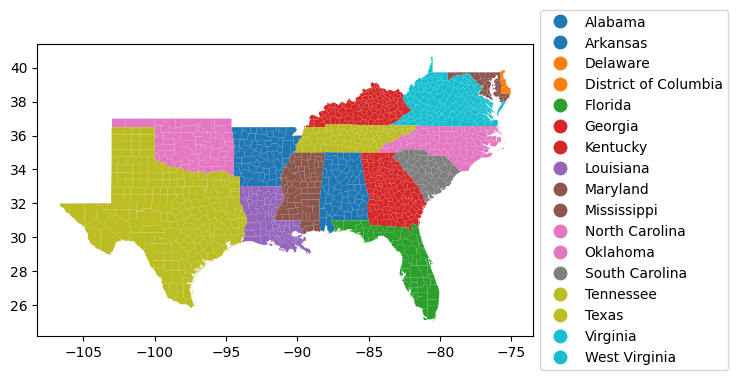

In [15]:
#ambil contoh sampel untuk peta amerika, beberapa negara bagian di amerika
ax = df.plot(column='STATE_NAME', categorical= True, legend=True, \
             legend_kwds={'loc': 'center left','bbox_to_anchor':(1,0.5),
                          'fmt': "{:.0f}"}) #fmt is ignored for categorical

In [16]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon


In [17]:
capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

#Buat subset dari data dunia yang hanya merupakan benua Amerika selatan
south_america = world[world["continent"] == "South America"]

#buat poligon khusus
polygon = Polygon([(0, 0), (0,90), (180,90), (180,0), (0,0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs = world.crs)

<ipython-input-17-945bdd396918>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
<ipython-input-17-945bdd396918>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


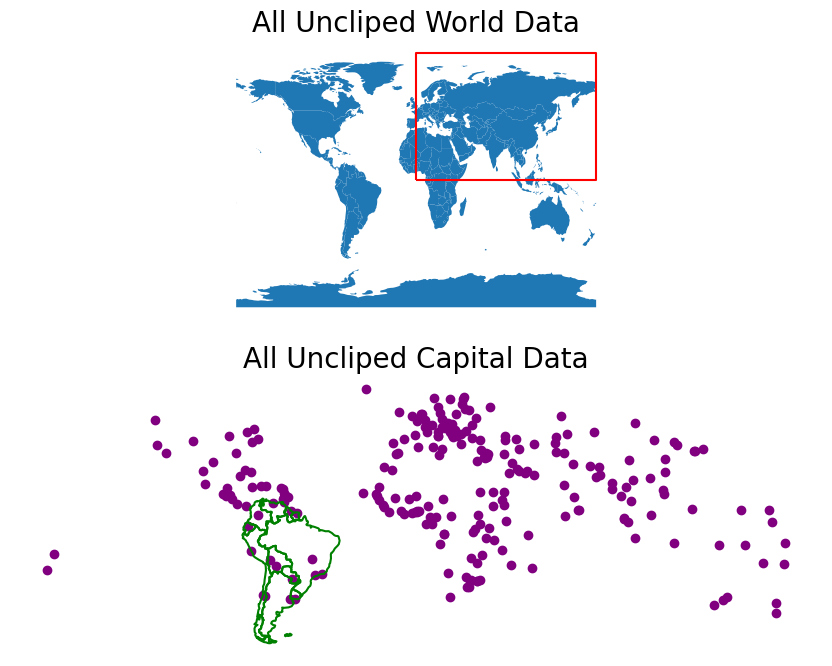

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
south_america.boundary.plot(ax=ax2, color="green")
capitals.plot(ax=ax2, color="purple")
ax1.set_title("All Uncliped World Data", fontsize=20)
ax2.set_title("All Uncliped Capital Data", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

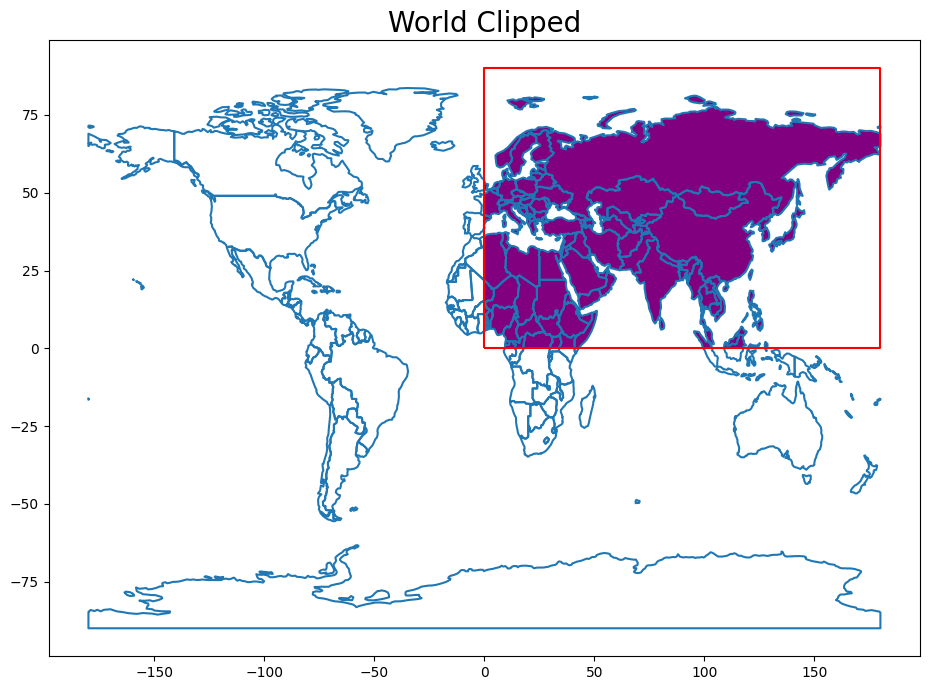

In [19]:
world_clipped = world.clip(polygon)

#plot dibawah ini menunjukan hasil fungsi klip yang diterapkan ke dunia
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped",fontsize=20)
plt.show()

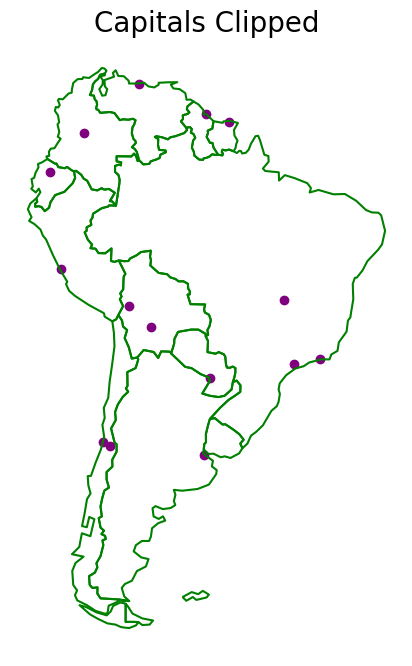

In [20]:
capitals_clipped = capitals.clip(south_america)

#plot dibawah ini menunjukan hasil fungsi klip ibukota
fig, ax = plt.subplots(figsize=(12,8))
capitals_clipped.plot(ax=ax, color="purple")
south_america.boundary.plot(ax=ax, color="green")
ax.set_title("Capitals Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 1.7 MB/s eta 0:00:00


<ipython-input-21-775e33401d78>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  df = geopandas.read_file(geopandas.datasets.get_path('nybb'))


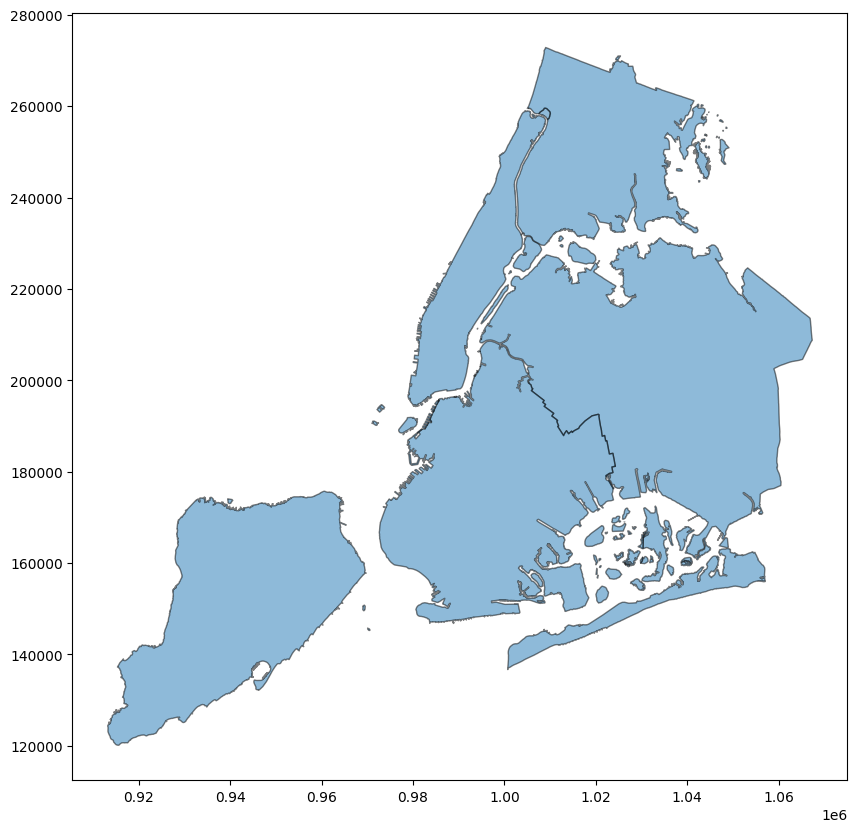

In [21]:
!pip install contextily
import geopandas
import contextily as cx

df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

In [22]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
df_wm = df.to_crs(epsg=3857)

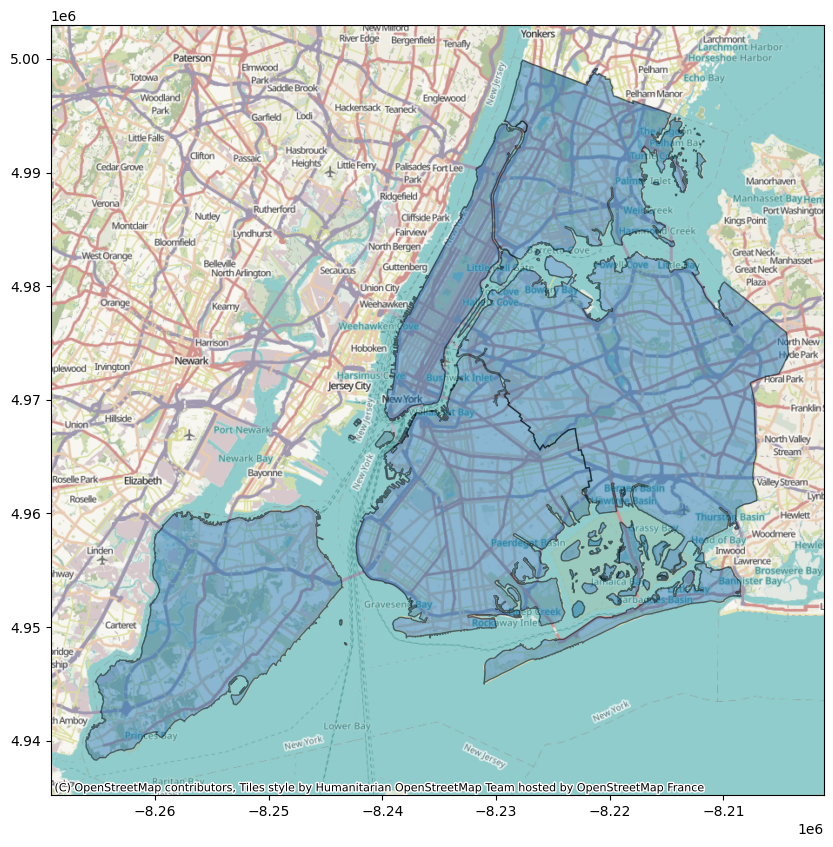

In [24]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

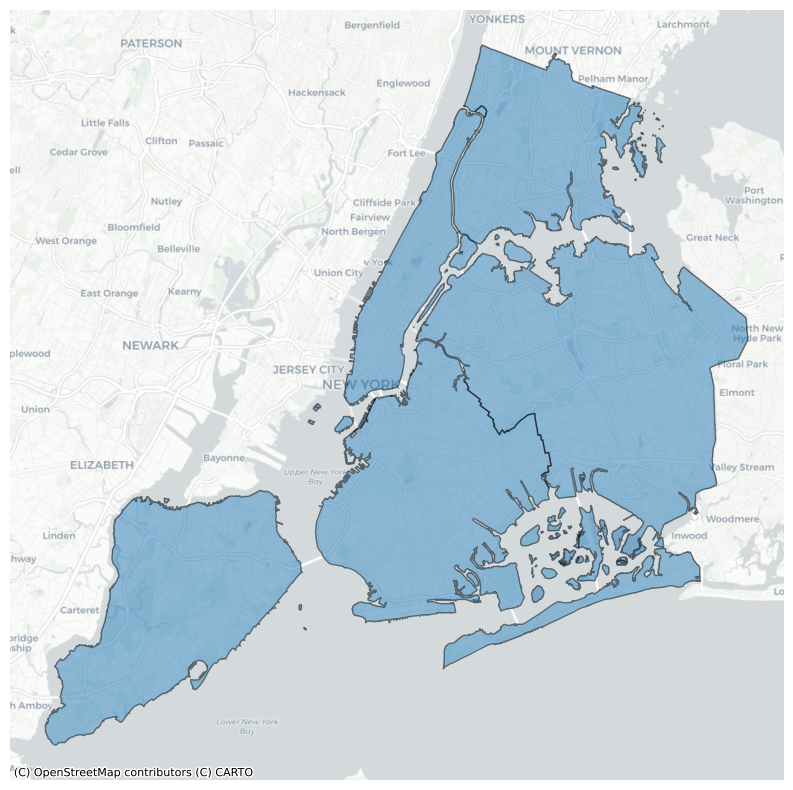

In [47]:

ax = df_wm.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)# Tidak dapat menggunakan Stamen, jadinya saya ganti menggunakan CartoDB.Positron
ax.set_axis_off()

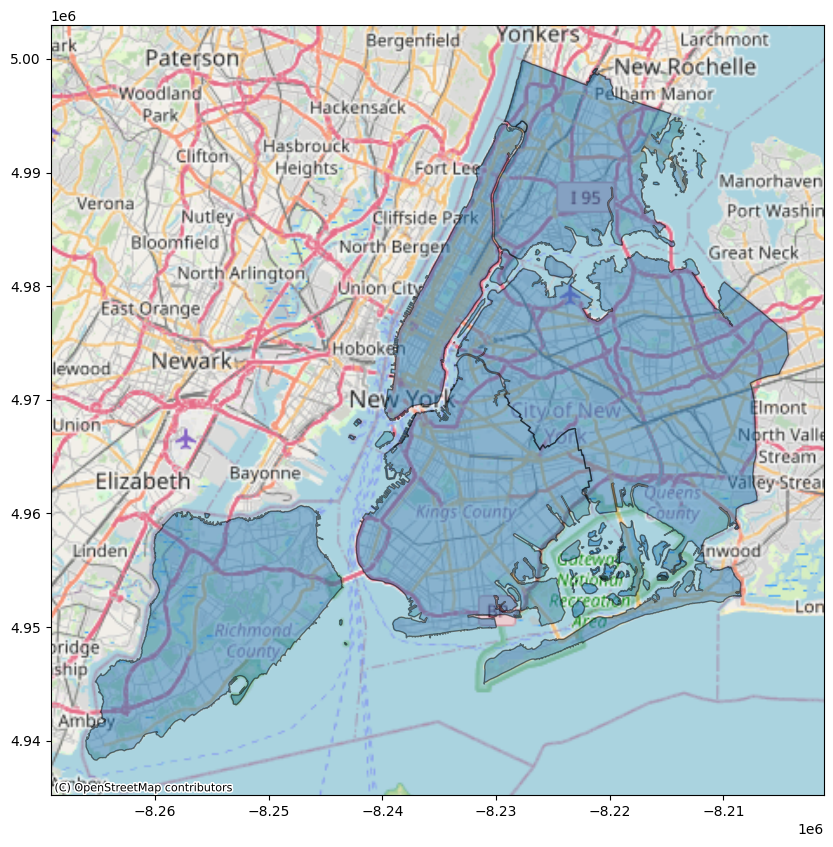

In [31]:
ax = df_wm.plot(figsize = (10, 10), alpha = 0.5, edgecolor = 'k')
cx.add_basemap(ax, source = cx.providers.OpenStreetMap.Mapnik, zoom = 12) # Tidak dapat menggunakan Stamen, jadi di ubah menjadi OpenStreetMap.Mapnik
cx.add_basemap(ax, source = cx.providers.OpenStreetMap.Mapnik, zoom = 10)

In [32]:
!pip install geoplot
import geopandas as gpd
import geoplot
import folium #menggunakan folium

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

<ipython-input-32-eb95df95a167>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geopandas.datasets.get_path('naturalearth_lowres')


<ipython-input-33-3d901963970d>:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  world = world.explode()
<ipython-input-33-3d901963970d>:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  boroughs = boroughs.explode()


<Axes: >

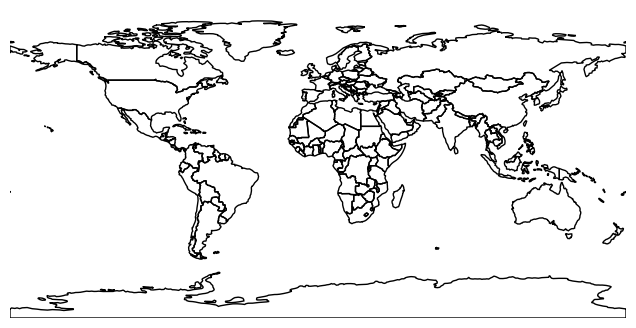

In [33]:
# Convert MultiPolygon to Polygon
world = world.explode()
boroughs = boroughs.explode()

geoplot.polyplot(world,figsize=(8,4))

In [34]:
path = gpd.datasets.get_path('nybb')
df = gpd.read_file(path)
df.head()

<ipython-input-34-913fbb13a6ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  path = gpd.datasets.get_path('nybb')


BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

<function matplotlib.pyplot.show(close=None, block=None)>

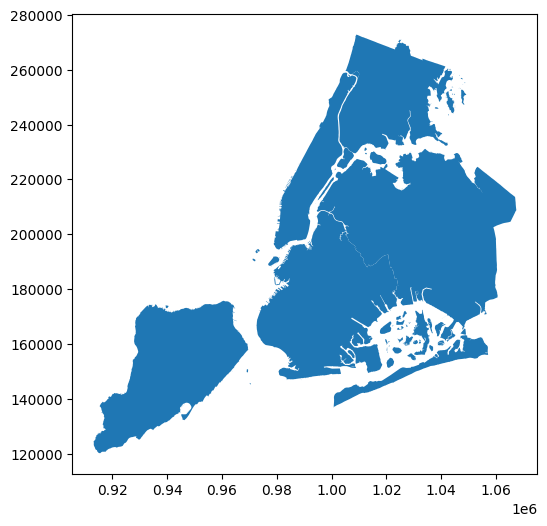

In [35]:
df.plot(figsize=(6, 6))
plt.show

In [36]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
df = df.to_crs(epsg=4326)
print(df.crs)
df.head()

EPSG:4326


BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

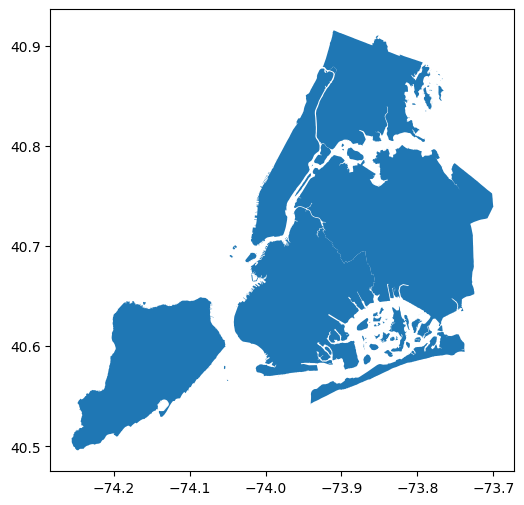

In [38]:
df.plot(figsize=(6, 6))
plt.show()

In [39]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m

In [40]:
import geopandas as gpd
import folium

for _, r in df.iterrows():
    # Simplifikasi geometri
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()

    # Buat objek GeoJson dan tambahkan ke peta
    geo_j = folium.GeoJson(data=geo_j,
                            style_function=lambda x: {'fillColor': 'orange'})

    # Tambahkan popup dengan informasi BoroName
    folium.Popup(r['BoroName']).add_to(geo_j)

    # Tambahkan GeoJson ke peta
    geo_j.add_to(m)

# Tampilkan peta
m

In [41]:
import libpysal as ps

pth = ps.examples.get_path("columbus.shp")
tracts = gpd.GeoDataFrame.from_file(pth)
print('Obsevations, Attributes:', tracts.shape)
tracts.head()

Obsevations, Attributes: (49, 21)


AREA  PERIMETER  COLUMBUS_  COLUMBUS_I  POLYID  NEIG      HOVAL  \
0  0.309441   2.440629          2           5       1     5  80.467003   
1  0.259329   2.236939          3           1       2     1  44.567001   
2  0.192468   2.187547          4           6       3     6  26.350000   
3  0.083841   1.427635          5           2       4     2  33.200001   
4  0.488888   2.997133          6           7       5     7  23.225000   

      INC      CRIME      OPEN  ...  DISCBD          X          Y  NSA  NSB  \
0  19.531  15.725980  2.850747  ...    5.03  38.799999  44.070000  1.0  1.0   
1  21.232  18.801754  5.296720  ...    4.27  35.619999  42.380001  1.0  1.0   
2  15.956  30.626781  4.534649  ...    3.89  39.820000  41.180000  1.0  1.0   
3   4.477  32.387760  0.394427  ...    3.70  36.500000  40.520000  1.0  1.0   
4  11.252  50.731510  0.405664  ...    2.83  40.009998  38.000000  1.0  1.0   

    EW   CP   THOUS  NEIGNO                                           geometry  
0  1.0  0.0  1000.0  1005.0  POLYGON ((8.62413 14.23698, 8.55970 14.74245, ...  
1  0.0  0.0  1000.0  1001.0  POLYGON ((8.25279 14.23694, 8.28276 14.22994, ...  
2  1.0  0.0  1000.0  1006.0  POLYGON ((8.65331 14.00809, 8.81814 14.00205, ...  
3  0.0  0.0  1000.0  1002.0  POLYGON ((8.45950 13.82035, 8.47341 13.83227, ...  
4  1.0  0.0  1000.0  1007.0  POLYGON ((8.68527 13.63952, 8.67758 13.72221, ...  

[5 rows x 21 columns]

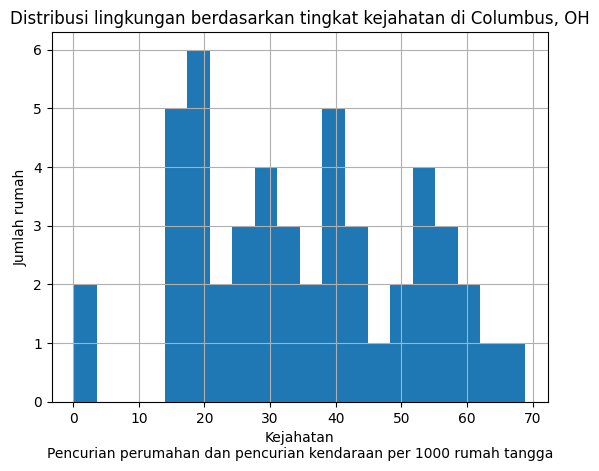

In [42]:
tracts['CRIME'].hist(bins=20)
plt.xlabel('Kejahatan\nPencurian perumahan dan pencurian kendaraan per 1000 rumah tangga')
plt.ylabel('Jumlah rumah')
plt.title('Distribusi lingkungan berdasarkan tingkat kejahatan di Columbus, OH')
plt.show()

<Axes: >

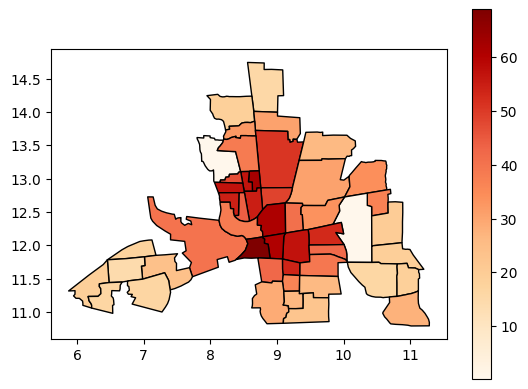

In [43]:
tracts.plot(column='CRIME', cmap='OrRd', edgecolor='k', legend=True)

<Axes: >

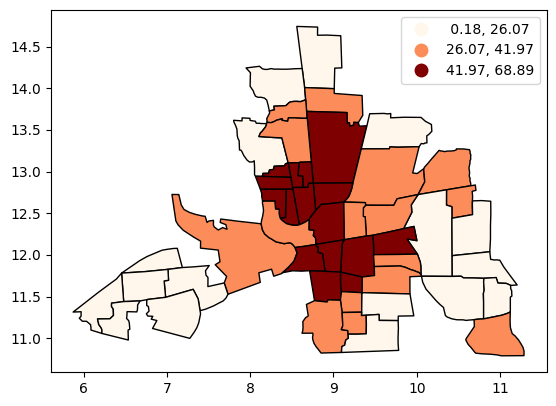

In [44]:
# fungsi ini digunakan untuk memetakan suatu wilayah yang berdasarkan kejahatan, dan dalam wilayah tersebut dibagi menjadi 3 kategori berdasarkan dari pusat
tracts.plot(column='CRIME', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True)

<Axes: >

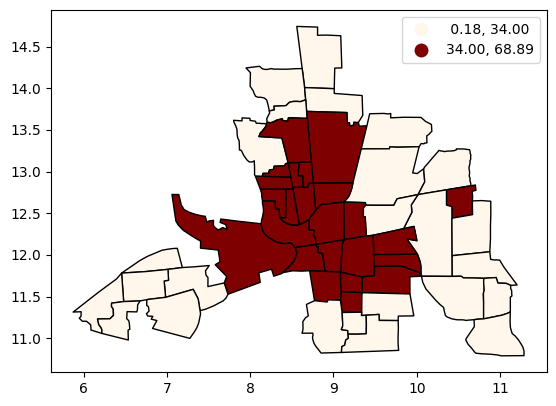

In [45]:
# fungsi ini digunakan untuk memetakan suatu wilayah yang berdasarkan kejahatan, dan dalam wilayah tersebut dibagi menjadi 2 kategori
tracts.plot(column='CRIME', scheme='quantiles', k=2, cmap='OrRd', edgecolor='k', legend=True)

<Axes: >

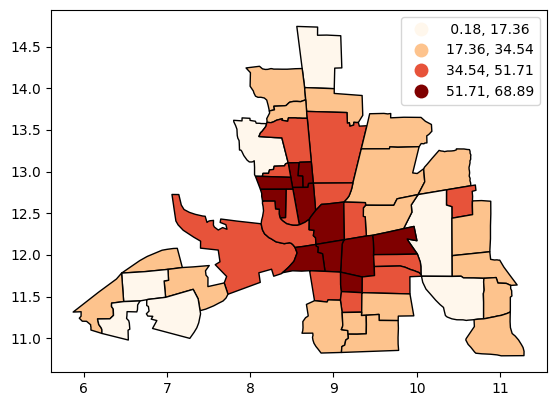

In [46]:
# fungsi ini digunakan untuk memetakan suatu wilayah yang berdasarkan kejahatan, dan dalam wilayah tersebut dibagi menjadi 4 kategori
tracts.plot(column='CRIME', scheme='equal_interval', k=4, cmap='OrRd', edgecolor='k', legend=True)